# Machine Learning: Lab 1
## Introduction
TA: Bryan Coulier (bryan.coulier@kuleuven.be)

## 1) Setup
Install Anaconda (GUI):
https://www.anaconda.com/download

Create a new environment and install numpy, matplotlib, pandas, scikit-learn and seaborn.

Start jupyter lab.

Note: if you prefer a minimal installation, install miniconda (CLI):
https://docs.conda.io/projects/conda/en/latest/user-guide/install/windows.html

After opening a miniconda cli, do the following:

Create new conda env
```
conda create -n machine_learning python=3.9
```

Install necessary packages
```
conda install numpy matplotlib pandas scikit-learn seaborn jupyter
```

Run jupyter-notebook
```
jupyter notebook
```

## 2) Data preprocessing & analysis
Useful links:
- https://pandas.pydata.org/
- https://numpy.org/
- https://seaborn.pydata.org/
- https://matplotlib.org/
- https://scikit-learn.org/stable/datasets/toy_dataset.html

In [91]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as pltp

Load the iris dataset from sklearn, display the data and target shape.

In [92]:
from sklearn.datasets import load_iris
# Load the iris dataset
iris = load_iris()

# Display the data and target shape
print("Data shape:", iris.data.shape)
print("Target shape:", iris.target.shape)

Data shape: (150, 4)
Target shape: (150,)


Convert the dataset to a pandas dataframe (data + target) and print the first 5 rows.

In [93]:
# Convert the iris dataset to a pandas dataframe
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Print the first 5 rows of the dataframe
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


Use seaborn to create a pairplot of the features (use target as hue).

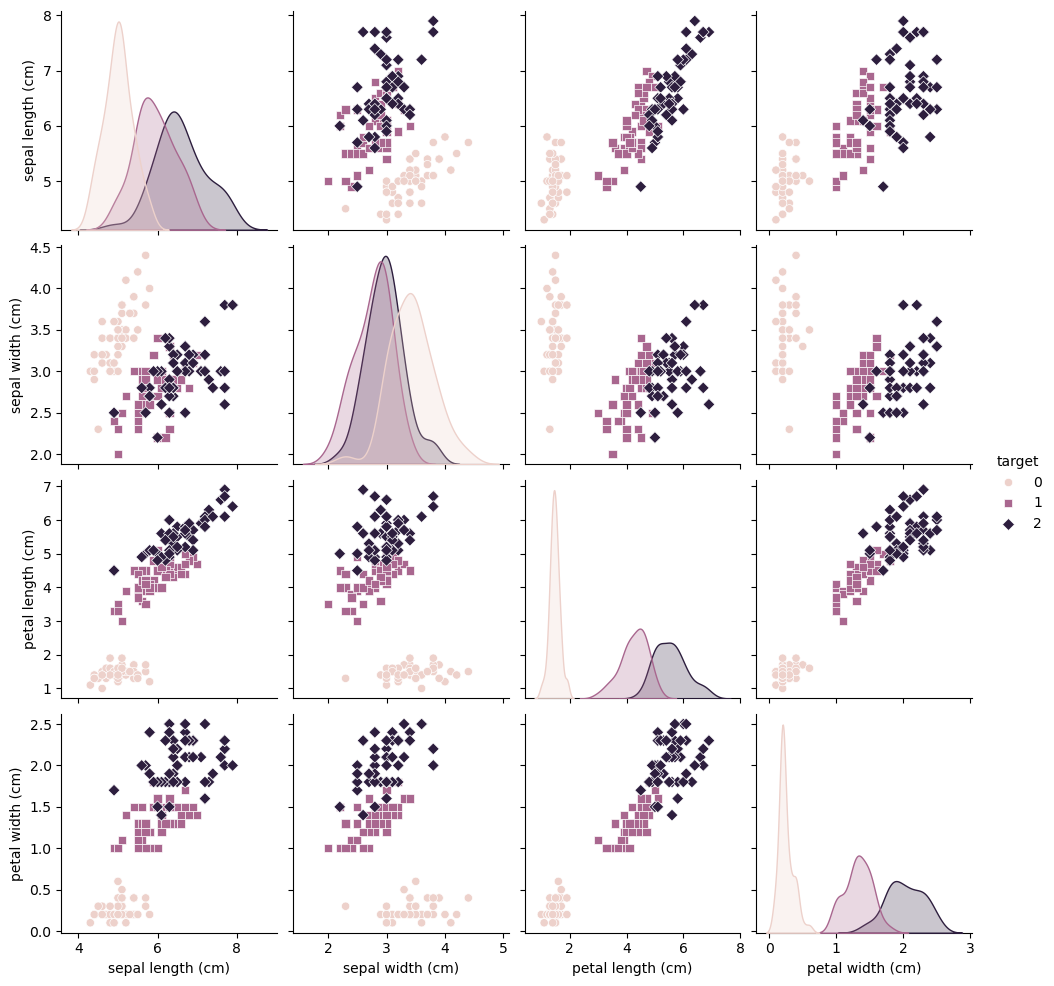

In [94]:
# Create a pairplot of the iris dataset features with target as hue
sns.pairplot(iris_df, hue='target', markers=["o", "s", "D"])
plt.show()

Use seaborn to create a violinplot of sepal length by species.

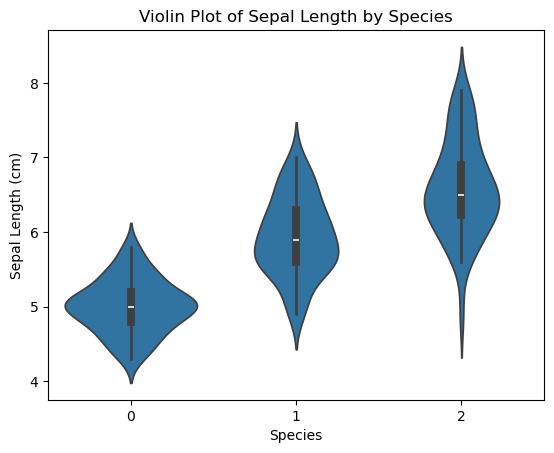

In [95]:
# Create a violin plot of sepal length by species
sns.violinplot(x='target', y='sepal length (cm)', data=iris_df)
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

Use Matplotlib to create a histogram of petal width, use a bin size of 10.

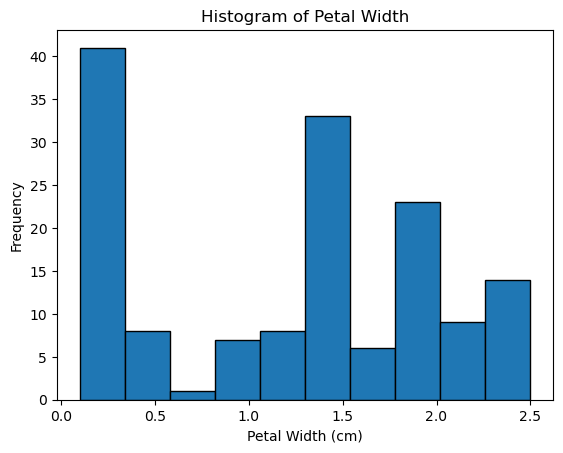

In [96]:
# Create a histogram of petal width with a bin size of 10
plt.hist(iris_df['petal width (cm)'], bins=10, edgecolor='black')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.show()

Load the breast cancer dataset from sklearn as a dataframe and display the feature-names.

In [97]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

# Convert the dataset to a pandas dataframe
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

# Display the feature names
print("Feature names:", breast_cancer.feature_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Calculate statistics (count, mean, standard-deviation...) for each feature in the breast cancer dataset and plot histograms for each feature.

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

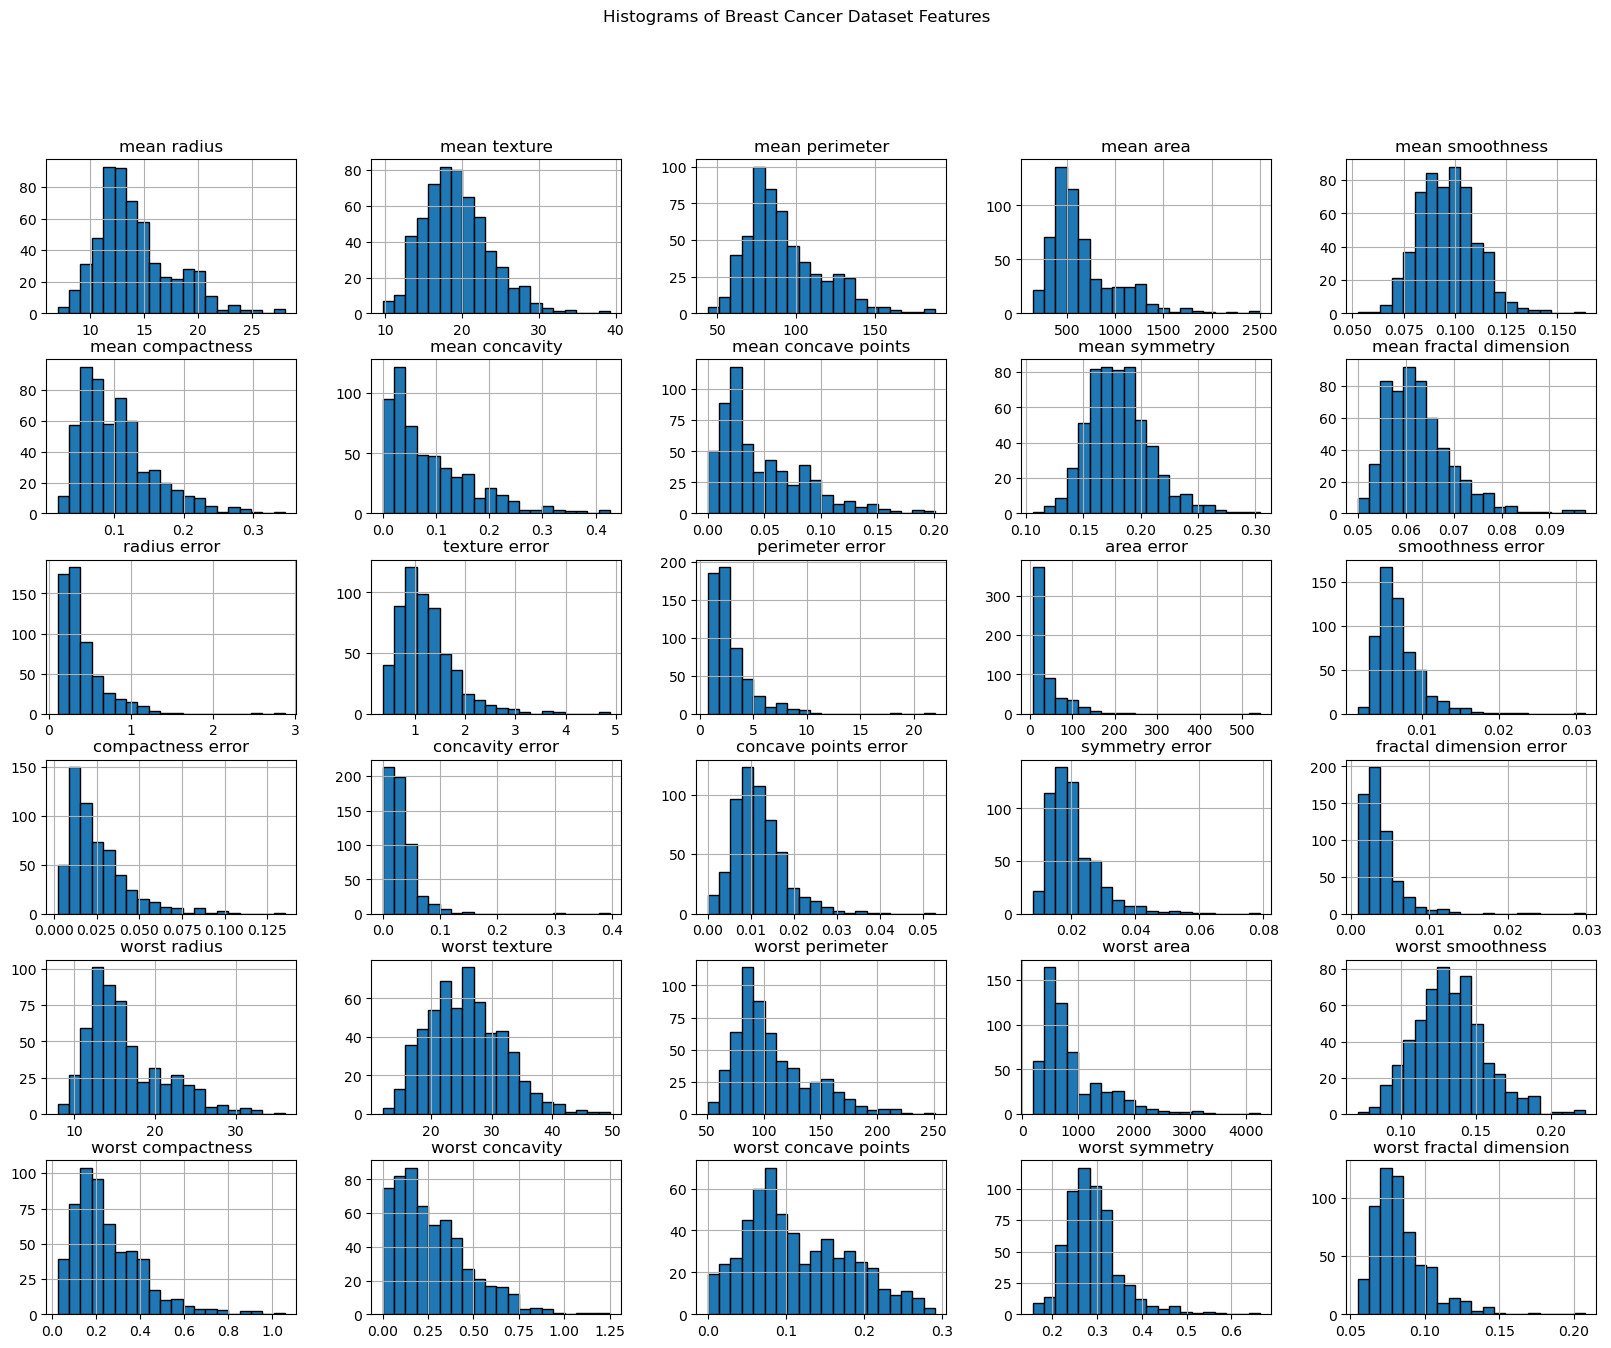

In [98]:
# Calculate statistics for each feature in the breast cancer dataset
statistics = breast_cancer_df.describe()
print(statistics)

# Plot histograms for each feature
breast_cancer_df.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Breast Cancer Dataset Features')
plt.show()

Create a correlation matrix of the features of the breast cancer dataset with seaborn.

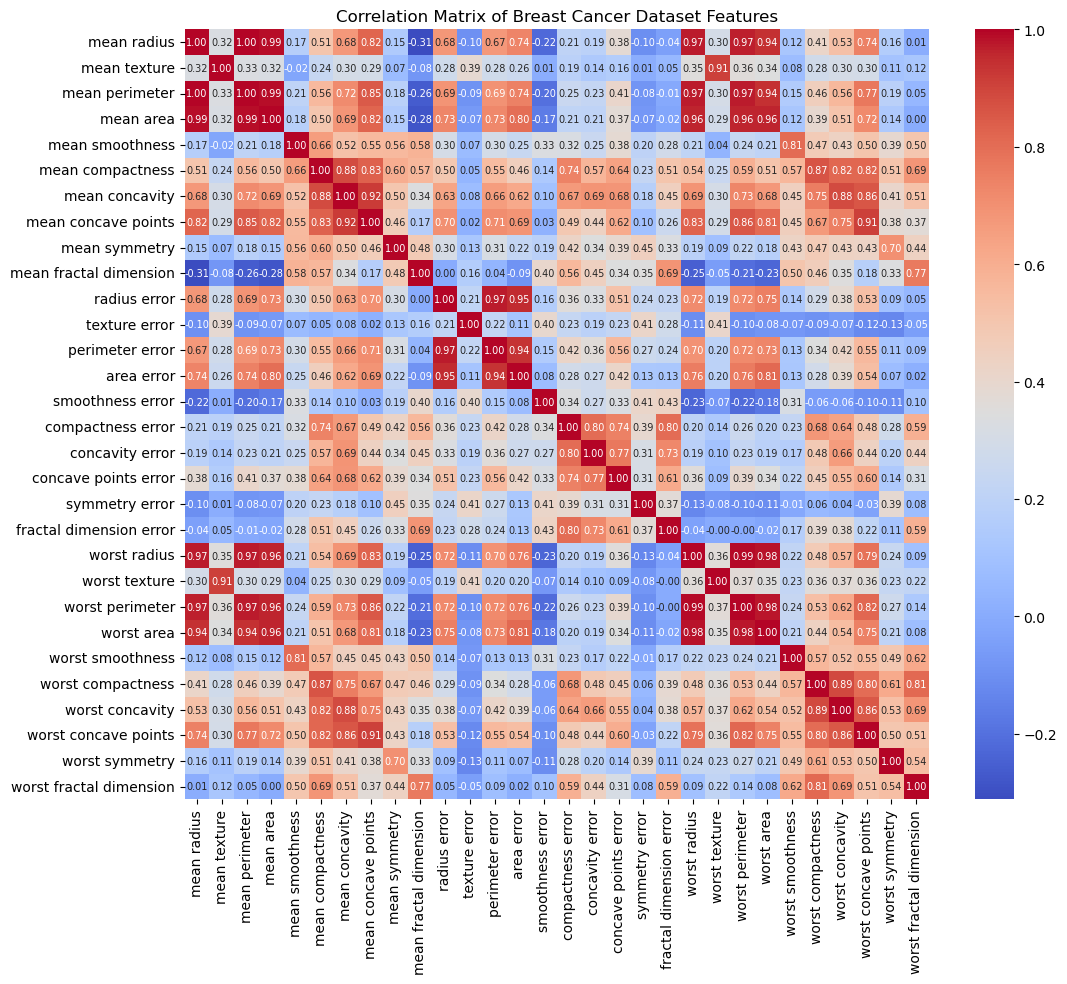

In [99]:
# Create a correlation matrix
correlation_matrix = breast_cancer_df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm' ,annot_kws={"size": 7})
plt.title('Correlation Matrix of Breast Cancer Dataset Features')
plt.show()

Create a boxplot of the mean radius in function of the target (benign or malignant tumors).

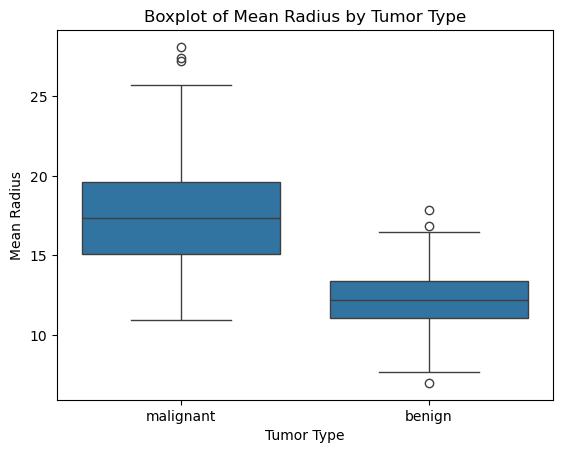

In [100]:
# Add the target names to the dataframe for better readability
breast_cancer_df['target_names'] = breast_cancer.target_names[breast_cancer.target]

# Create a boxplot of the mean radius in function of the target
sns.boxplot(x='target_names', y='mean radius', data=breast_cancer_df)
plt.xlabel('Tumor Type')
plt.ylabel('Mean Radius')
plt.title('Boxplot of Mean Radius by Tumor Type')
plt.show()

## Problem 1: Customers

Given a dataset containing information about customers of a store, the task is to analyze the data and create visualizations to understand the customers better. The dataset contains the following columns:

- "Age": the age of the customer.
- "Gender": the gender of the customer.
- "Annual Income (Euro)": the annual income of the customer.
- "Spending Score (1-100)": the spending score of the customer.

### Tasks:

1) Load the dataset into a pandas dataframe.
2) Print the first 5 rows of the dataset.
3) Check for missing values in the dataset and handle them appropriately by replacing them with the mean value.
4) Check the distribution of the variables using histograms and boxplots.
5) Calculate the correlation between the variables and visualize the correlation by using a Heat map.
6) Create a scatter plot of "Annual Income (Euro)" vs "Spending Score (1-100)" and color the points based on gender.
7) Create a bar plot to show the count of male and female customers.


Note: use the following code to generate a sample dataframe for the task:

```Python
import pandas as pd
import numpy as np

np.random.seed(0)

# Generate random values for annual income and spending score
n = 100
income_mean = 60
income_sd = 10
spending_mean = 50
spending_sd = 10

income = np.random.normal(income_mean, income_sd, n)
spending = np.random.normal(spending_mean, spending_sd, n)

# Add some noise to the spending variable
noise = np.random.normal(0, 5, n)
spending += noise

# Create a correlation between income and spending
corr = 0.8
cov = corr * income_sd * spending_sd
income, spending = np.random.multivariate_normal([income_mean, spending_mean], [[income_sd**2, cov], [cov, spending_sd**2]], n).T


data = {"Age": np.random.randint(18, 65, size=(n,)),
        "Gender": np.random.choice(["Male", "Female"], size=(n,)),
        "Annual Income (Euro)": income,
        "Spending Score (1-100)": spending}

```

Hieronder staat het script voor de initialisatie van de dataset

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(0)

# Generate random values for annual income and spending score
n = 100
income_mean = 60
income_sd = 10
spending_mean = 50
spending_sd = 10

income = np.random.normal(income_mean, income_sd, n)
spending = np.random.normal(spending_mean, spending_sd, n)

# Add some noise to the spending variable
noise = np.random.normal(0, 5, n)
spending += noise

# Create a correlation between income and spending
corr = 0.8
cov = corr * income_sd * spending_sd
income, spending = np.random.multivariate_normal([income_mean, spending_mean], [[income_sd**2, cov], [cov, spending_sd**2]], n).T


data = {"Age": np.random.randint(18, 65, size=(n,)),
        "Gender": np.random.choice(["Male", "Female"], size=(n,)),
        "Annual Income (Euro)": income,
        "Spending Score (1-100)": spending}


De dataset in een pandas dataframe laden

In [ ]:
customers_df = pd.DataFrame(data)

Uitprinten van de eerste 5 rijen van de dataset

In [ ]:
print(customers_df.head())

kijken of er waardes ontbreken en deze invullen met de gemiddelde waarde van de kolom

In [ ]:
customers_df.fillna(customers_df.mean(numeric_only=True), inplace=True)


De distributie bekijken aan de hand van histogrammen en boxplots

In [ ]:
customers_df.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Histograms of Customer Dataset Features')
plt.show()

plt.figure(figsize=(14, 10))
for i, column in enumerate(customers_df.columns, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(y=customers_df[column])
        plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

het berekenen van de corelatie tussen de variabelen en dit aan de hand van een heatmap visualiseren

In [ ]:
correlation_matrix_customers = customers_df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_customers, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Customer Dataset Features')
plt.show()

scatterplot van het gemiddlede jaarlijkse incomen in euro ten opzichte van de spendeerscore en kleurpunten op basis van gender

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customers_df, x='Annual Income (Euro)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income vs Spending Score by Gender')
plt.xlabel('Annual Income (Euro)')
plt.ylabel('Spending Score (1-100)')
plt.show()

een bar plot voor het aantal mannelijke en vrouwelijke klanten

   Age  Gender  Annual Income (Euro)  Spending Score (1-100)
0   20  Female             67.151332               67.638272
1   37  Female             63.271915               48.970090
2   21  Female             55.135059               42.221211
3   31    Male             76.916582               58.399193
4   29  Female             53.922905               42.913674


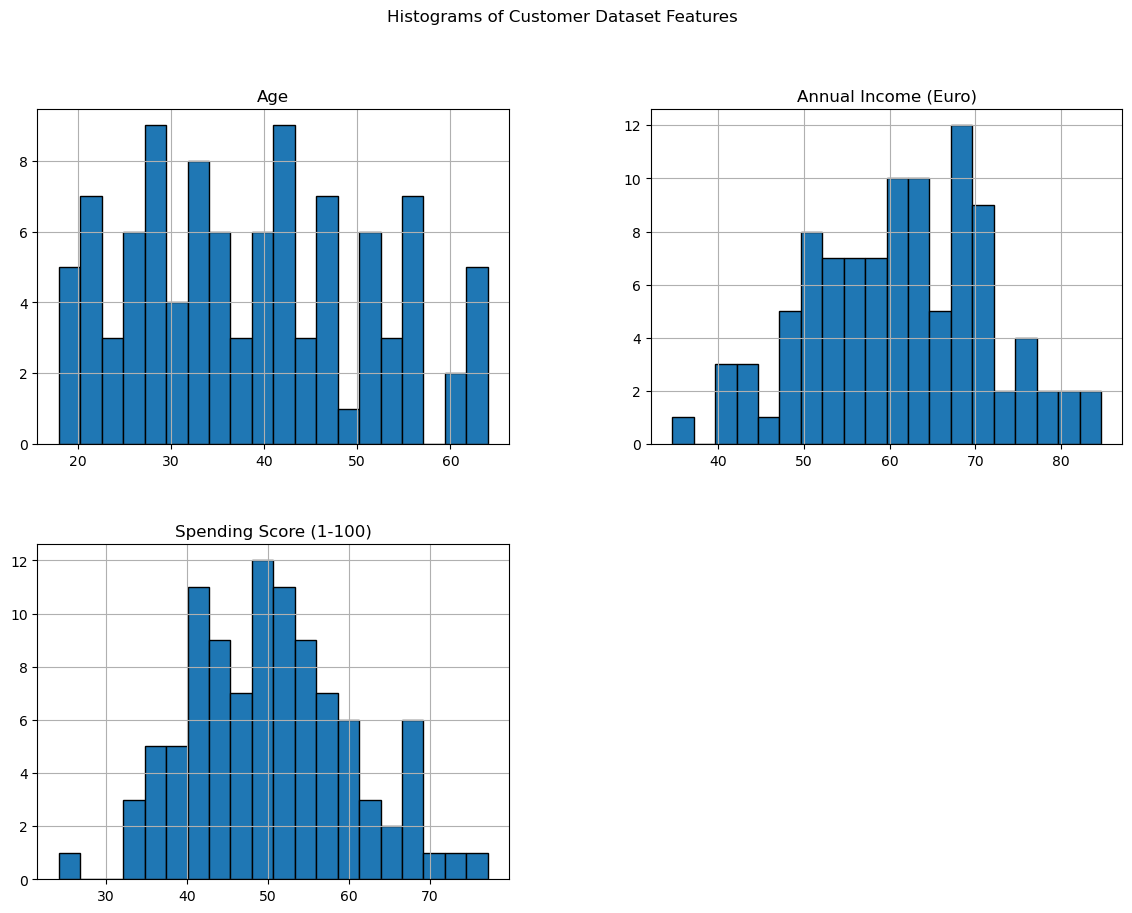

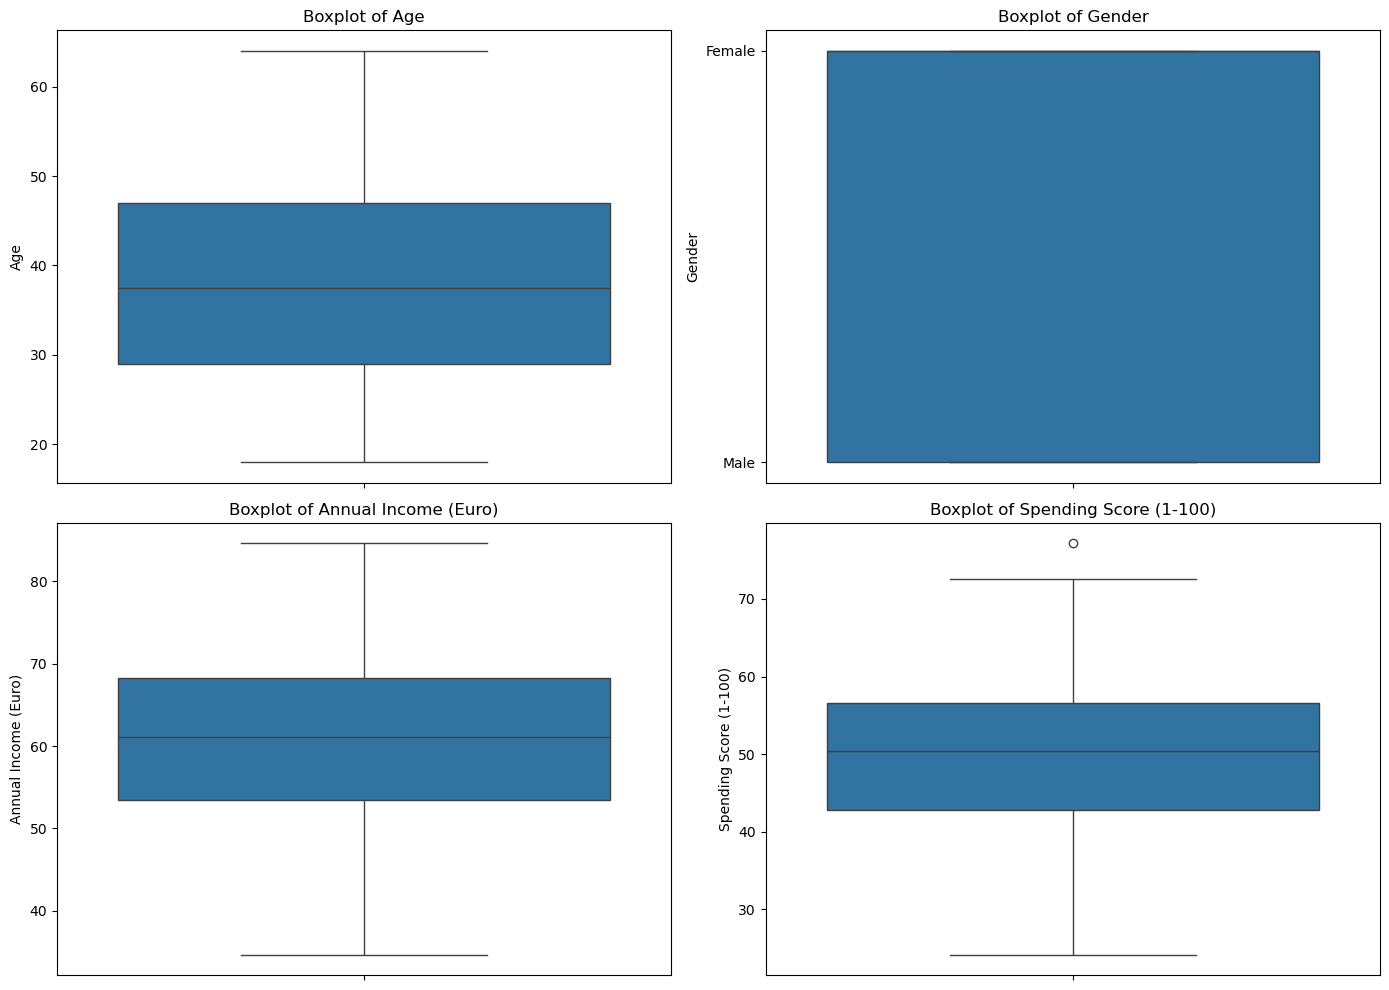

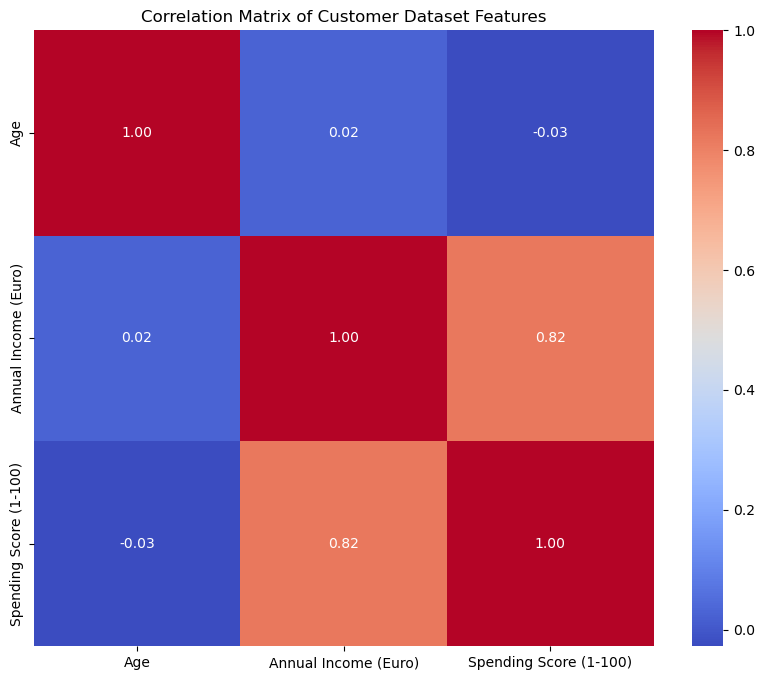

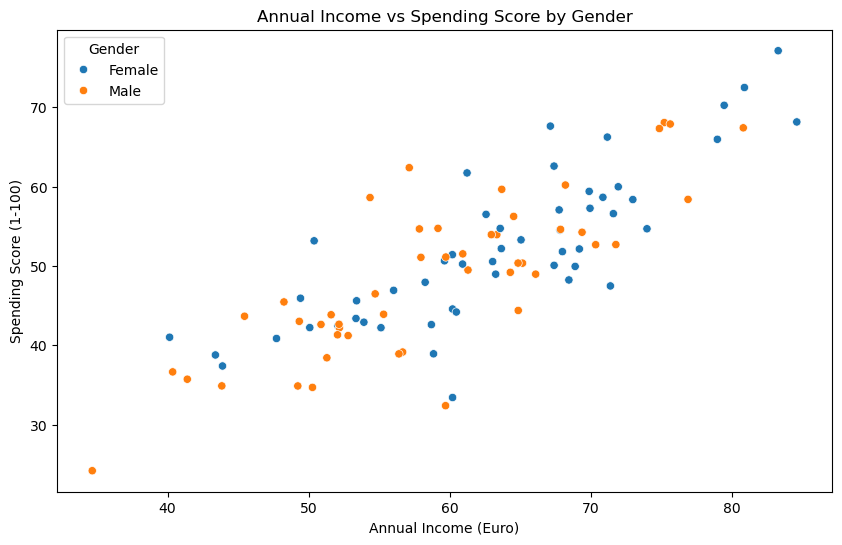

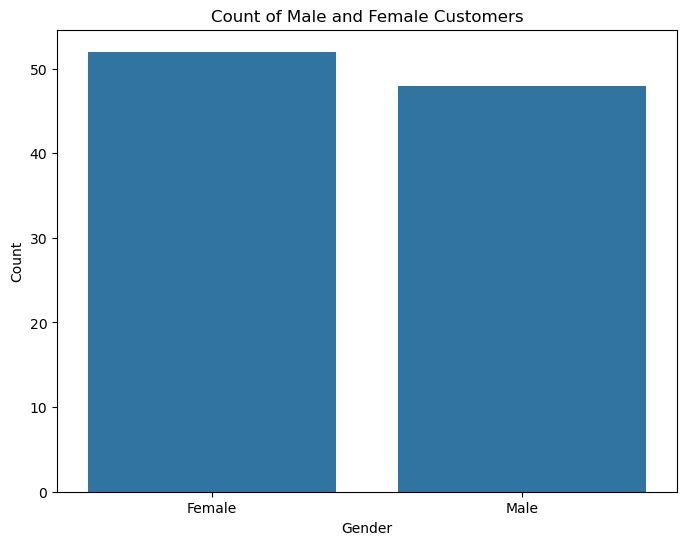

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(data=customers_df, x='Gender')
plt.title('Count of Male and Female Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## Problem 2: Housing
Using the Boston Housing dataset (Housing.csv), perform a comprehensive statistical analysis to understand the characteristics and relationships within the data. The dataset contains various features of houses in Boston neighborhoods, including crime rates, environmental factors, and housing values. A detailed description of the features can be found at: http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Your task is to:
1. Analyze the quality and characteristics of the dataset
2. Investigate relationships between features
3. Study the distribution of housing values and other relevant features
4. Prepare the data for potential modeling tasks
5. Present your findings with appropriate visualizations and statistical evidence to support your conclusions. Consider what preprocessing steps would be necessary for a machine learning application.

Note: Think carefully about which statistical methods and visualizations would be most appropriate for understanding this dataset. Explain each method or process in detail and justify your choices.
A very vague and general description of the used methods is not sufficient. 
Do not provide graphs without any explanation or analysis.

Your critical and analytical thinking is more important than the provided solution.